<a href="https://colab.research.google.com/github/JeongSoong/Machine_learning/blob/main/%EB%AC%B8%EC%A0%95%EC%88%98_201911047_7%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

심층 신경망으로 이미지 분류류

1.   이미지 데이터셋 로드
2.   이미지 데이터 정규화: 수렴속도 증가
3.   DenseLayer에 입력하기 위한 차원축소:reshape().shape
4.   모델 생성(DenseLayer(노드수,활성화 함수))
5.   compile(): 컴파일(옵티마이저,손실함수,평가지표)
6.   fit(): 훈련
7.   evaluate(): 검증
8.   predict(): 예측



In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
##1. 케라스 내장 데이터셋 업로드
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


가중치 초기화

In [4]:
##kernel_initializer = 'uniform'
dense = tf.keras.layers.Dense(256,kernel_initializer = 'uniform', activation = 'relu')

In [5]:
##kernel_initializer = 'normal'
dense = tf.keras.layers.Dense(256,kernel_initializer = 'normal', activation = 'relu')

In [6]:
##kernel_initializer = 'he_normal'
dense = tf.keras.layers.Dense(256,kernel_initializer = 'he_normal', activation = 'relu')

In [7]:
print("train set: ", x_train.shape, y_train.shape)
print("test set: ", x_test.shape, x_test.shape)

train set:  (60000, 28, 28) (60000,)
test set:  (10000, 28, 28) (10000, 28, 28)


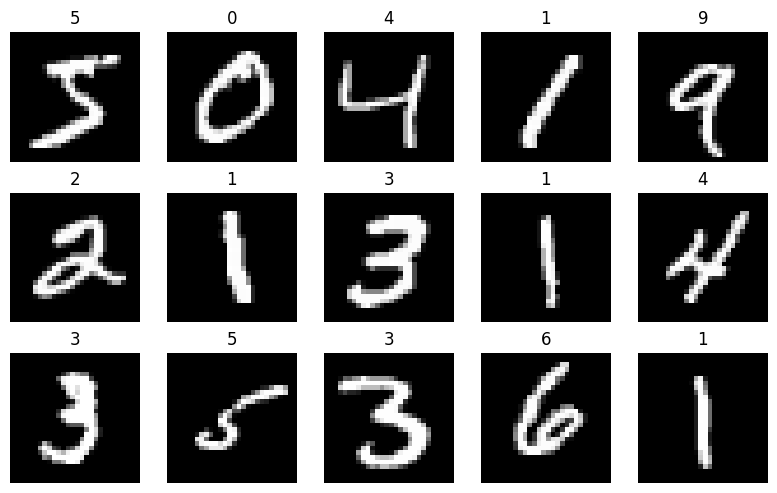

In [8]:
##훈련용 데이터 시각화
fig,axes = plt.subplots(3,5)
fig.set_size_inches(8,5)

for i in range(15):
    ax = axes[i//5, i%5]
    ax.imshow(x_train[i], cmap = 'gray')
    ax.axis('off')
    ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

In [9]:
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

2.데이터 정규화

In [10]:
##정규화: 0~1사이 값으로 변환, 최대값으로 나눈다.
x_train_n = x_train/x_train.max()

In [11]:
x_train_n[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

3. 차원축소

In [12]:
##차원 축소
x_train.reshape(60000,-1).shape

(60000, 784)

In [13]:
tf.keras.layers.Flatten()(x_train).shape

TensorShape([60000, 784])

활성화 함수; 출력 함수

In [14]:
tf.keras.layers.Dense(128, activation='relu')

입력과 출력

In [15]:
##출력층이 1인 경우: sigmoid
tf.keras.layers.Dense(1, activation = 'sigmoid')

In [16]:
##출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(10,activation='sigmoid')

모델생성

In [17]:
##가중치를 적용하지 않은 경우
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28,28)),
                             tf.keras.layers.Dense(64, activation = 'relu'),
                             tf.keras.layers.Dense(32, activation = 'relu'),
                             tf.keras.layers.Dense(10, activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [18]:
adam = tf.keras.optimizers.Adam(lr=0.001)
acc=tf.keras.metrics.SparseCategoricalAccuracy()
model.compile(optimizer=adam, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

손실함수

In [19]:
##출력 노드가 1개, sigmoid활성화 함수를 적용한 경우
model.compile(loss='binary_crossentropy')

In [20]:
##출력 노드가 2개이상 softmax활성화 함수를 적용한 경우
##y가 원 핫 벡터가 아닌 경우
model.compile(loss='sparse_categorical_crossentropy')

옵티마이저: 손실으 낮추기 위해 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는데 최적화 방법법

In [21]:
#클래스 인스턴스로 지정
adam=tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

모델 훈련시 훈련 데이터: x_train, y_train 검증 데이터: validation_data=(x_test,y_test)

In [22]:
history = model.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 15s 3ms/step - loss: 1.7066 - accuracy: 0.7818 - val_loss: 0.5299 - val_accuracy: 0.8586
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3973 - accuracy: 0.8922 - val_loss: 0.3218 - val_accuracy: 0.9117
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2753 - accuracy: 0.9238 - val_loss: 0.2446 - val_accuracy: 0.9360
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2098 - accuracy: 0.9433 - val_loss: 0.2033 - val_accuracy: 0.9524
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1639 - accuracy: 0.9544 - val_loss: 0.1889 - val_accuracy: 0.9521
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1412 - accuracy: 0.9610 - val_loss: 0.1447 - val_accuracy: 0.9629
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1258 - accuracy: 0.9643 - val_loss: 0.2253 - val_accuracy

In [23]:
###keral_initializer = 'he_normal'을 적용한 경우
model_w_he = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28,28)),
                             tf.keras.layers.Dense(64, kernel_initializer = 'he_normal',activation = 'relu'),
                             tf.keras.layers.Dense(32, activation = 'relu'),
                             tf.keras.layers.Dense(10, activation = 'softmax')
])
model_w_he.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_w_he.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_w_he = model_w_he.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.9401 - accuracy: 0.7880 - val_loss: 0.5152 - val_accuracy: 0.8549
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3854 - accuracy: 0.8978 - val_loss: 0.3283 - val_accuracy: 0.9210
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2695 - accuracy: 0.9269 - val_loss: 0.2576 - val_accuracy: 0.9326
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2195 - accuracy: 0.9404 - val_loss: 0.2111 - val_accuracy: 0.9419
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1851 - accuracy: 0.9484 - val_loss: 0.2030 - val_accuracy: 0.9487
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1640 - accuracy: 0.9547 - val_loss: 0.1818 - val_accuracy: 0.9533
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1443 - accuracy: 0.9598 - val_loss: 0.1741 - val_accuracy

<function matplotlib.pyplot.show(close=None, block=None)>

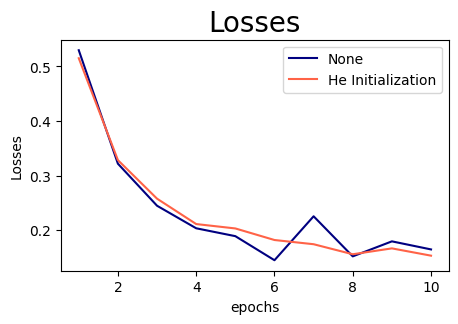

In [25]:
##두 모델 비교 시각화
plt.figure(figsize = (5,3))
plt.plot(np.arange(1,11), history.history['val_loss'], color = 'navy', label = 'None')
plt.plot(np.arange(1,11), history_w_he.history['val_loss'], color = 'tomato', label = 'He Initialization')
plt.title("Losses", fontsize = 20)
plt.xlabel('epochs')
plt.ylabel("Losses")
plt.legend()
plt.show

In [26]:
###keral_initializer = 'glorot_normal'을 적용한 경우
model_w_gl = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28,28)),
                             tf.keras.layers.Dense(64, kernel_initializer = 'glorot_normal',activation = 'sigmoid'),
                             tf.keras.layers.Dense(32, activation = 'sigmoid'),
                             tf.keras.layers.Dense(10, activation = 'softmax')
])
model_w_gl.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [27]:
model_w_gl.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_w_gl = model_w_gl.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.7660 - accuracy: 0.8084 - val_loss: 0.4010 - val_accuracy: 0.8821
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4008 - accuracy: 0.8829 - val_loss: 0.3599 - val_accuracy: 0.8907
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3632 - accuracy: 0.8902 - val_loss: 0.3283 - val_accuracy: 0.8988
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3333 - accuracy: 0.8986 - val_loss: 0.3205 - val_accuracy: 0.9023
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3283 - accuracy: 0.9002 - val_loss: 0.3200 - val_accuracy: 0.9023
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3138 - accuracy: 0.9034 - val_loss: 0.3131 - val_accuracy: 0.9077
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2919 - accuracy: 0.9110 - val_loss: 0.3053 - val_accuracy:

<function matplotlib.pyplot.show(close=None, block=None)>

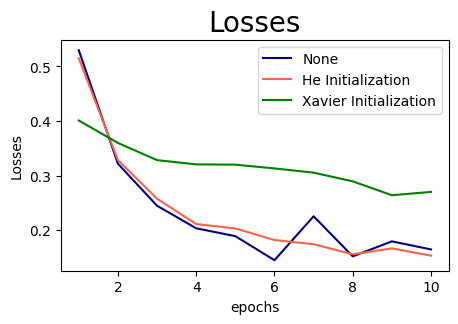

In [28]:
##세개 모델 비교 시각화
plt.figure(figsize = (5,3))
plt.plot(np.arange(1,11), history.history['val_loss'], color = 'navy', label = 'None')
plt.plot(np.arange(1,11), history_w_he.history['val_loss'], color = 'tomato', label = 'He Initialization')
plt.plot(np.arange(1,11), history_w_gl.history['val_loss'], color = 'green', label = 'Xavier Initialization')
plt.title("Losses", fontsize = 20)
plt.xlabel('epochs')
plt.ylabel("Losses")
plt.legend()
plt.show

규제(Regularization)

1.   L1: 가중치의 절대값에 0.001을 곱하여 비용 추가, 0.001
2.   L2: 가중치의 제곱에 0.001을 곱하여 비용 추가, 0.001



In [32]:
regularizer2 = tf.keras.regularizers.l2(0.001)
L2_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64,kernel_initializer = 'normal', kernel_regularizer = regularizer2, activation = 'relu'),
    tf.keras.layers.Dense(32,kernel_initializer = 'normal', kernel_regularizer = regularizer2, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [33]:
L2_model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
L2_model = L2_model.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7383 - accuracy: 0.8482 - val_loss: 0.3657 - val_accuracy: 0.9201
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2946 - accuracy: 0.9391 - val_loss: 0.2528 - val_accuracy: 0.9482
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2354 - accuracy: 0.9526 - val_loss: 0.2347 - val_accuracy: 0.9507
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2086 - accuracy: 0.9585 - val_loss: 0.2145 - val_accuracy: 0.9598
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1972 - accuracy: 0.9605 - val_loss: 0.2273 - val_accuracy: 0.9550
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1854 - accuracy: 0.9646 - val_loss: 0.2063 - val_accuracy: 0.9604
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1821 - accuracy: 0.9656 - val_loss: 0.2104 - val_accuracy

In [40]:
##L1규제
regularizer1 = tf.keras.regularizers.l1(0.001)
L1_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64,kernel_initializer = 'normal', kernel_regularizer = regularizer2, activation = 'relu'),
    tf.keras.layers.Dense(32,kernel_initializer = 'normal', kernel_regularizer = regularizer2, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [41]:
L1_model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
L1_model = L1_model.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7501 - accuracy: 0.8533 - val_loss: 0.3351 - val_accuracy: 0.9326
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3007 - accuracy: 0.9379 - val_loss: 0.2710 - val_accuracy: 0.9427
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2398 - accuracy: 0.9505 - val_loss: 0.2319 - val_accuracy: 0.9525
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2117 - accuracy: 0.9571 - val_loss: 0.2523 - val_accuracy: 0.9494
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1986 - accuracy: 0.9598 - val_loss: 0.2017 - val_accuracy: 0.9626
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1879 - accuracy: 0.9633 - val_loss: 0.2007 - val_accuracy: 0.9619
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1803 - accuracy: 0.9661 - val_loss: 0.1922 - val_accuracy:

<function matplotlib.pyplot.show(close=None, block=None)>

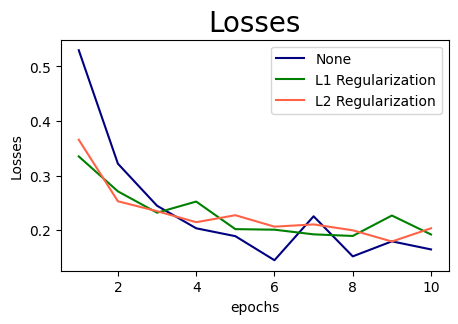

In [42]:
#L1,L2규제 모델비교 시각화
plt.figure(figsize = (5,3))
plt.plot(np.arange(1,11), history.history['val_loss'], color = 'navy', label = 'None')
plt.plot(np.arange(1,11), L1_model.history['val_loss'], color = 'green', label = 'L1 Regularization')
plt.plot(np.arange(1,11), L2_model.history['val_loss'], color = 'tomato', label = 'L2 Regularization')
plt.title("Losses", fontsize = 20)
plt.xlabel('epochs')
plt.ylabel("Losses")
plt.legend()
plt.show

#4-3 드롭아웃(Dropout)
1. 비율로 로드수를 줄이는 규제방법

In [44]:
#L1(0.01) + Dropout
regularizer1 = tf.keras.regularizers.l1(0.001)
droup_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                      tf.keras.layers.Dense(64,kernel_initializer = 'normal', kernel_regularizer = regularizer1, activation = 'relu'),
                                      tf.keras.layers.Dropout(0,5),
                                      tf.keras.layers.Dense(32,kernel_initializer = 'normal', kernel_regularizer = regularizer1, activation = 'relu'),
                                      tf.keras.layers.Dropout(0,5),
                                      tf.keras.layers.Dense(10,activation = 'softmax')
                                      ])
droup_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_30 (Dense)            (None, 64)                50240     
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_31 (Dense)            (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_32 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trai

In [45]:
droup_model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
droup_model = droup_model.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.7683 - accuracy: 0.8374 - val_loss: 0.9472 - val_accuracy: 0.9205
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7301 - accuracy: 0.9304 - val_loss: 0.5668 - val_accuracy: 0.9404
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5175 - accuracy: 0.9396 - val_loss: 0.5194 - val_accuracy: 0.9273
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4503 - accuracy: 0.9459 - val_loss: 0.4286 - val_accuracy: 0.9455
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4229 - accuracy: 0.9489 - val_loss: 0.4159 - val_accuracy: 0.9486
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4050 - accuracy: 0.9501 - val_loss: 0.3782 - val_accuracy: 0.9570
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4042 - accuracy: 0.9502 - val_loss: 0.4057 - val_accuracy:

<function matplotlib.pyplot.show(close=None, block=None)>

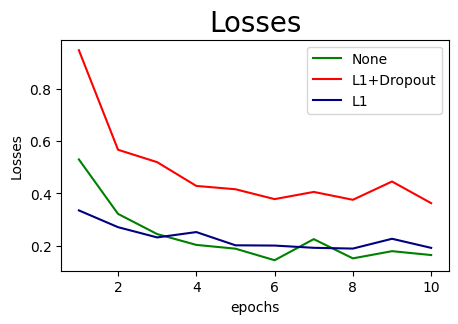

In [46]:
plt.figure(figsize = (5,3))
plt.plot(np.arange(1,11), history.history['val_loss'], color = 'green', label = 'None')
plt.plot(np.arange(1,11), droup_model.history['val_loss'], color = 'red', label = 'L1+Dropout')
plt.plot(np.arange(1,11), L1_model.history['val_loss'], color = 'navy', label = 'L1')
plt.title("Losses", fontsize = 20)
plt.xlabel('epochs')
plt.ylabel("Losses")
plt.legend()
plt.show

#4-4 배치 정규화(Batch Normanlization)
1. 각층에서 스케일을 조정

In [47]:
batch_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                   tf.keras.layers.Dense(64, activation = 'relu'),
                                   tf.keras.layers.BatchNormalization(),
                                   tf.keras.layers.Dense(32, activation = 'relu'),
                                   tf.keras.layers.BatchNormalization(),
                                   tf.keras.layers.Dense(10,activation = 'softmax')
                                   ])

In [48]:
batch_model.compile(optimizer='adam',
                    loss = 'sparse_categorical_crossentropy',
                    metrics=['accuracy'])
batch_model = batch_model.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.3048 - accuracy: 0.9112 - val_loss: 0.1422 - val_accuracy: 0.9564
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1497 - accuracy: 0.9537 - val_loss: 0.1099 - val_accuracy: 0.9667
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1181 - accuracy: 0.9637 - val_loss: 0.1044 - val_accuracy: 0.9697
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1005 - accuracy: 0.9683 - val_loss: 0.0981 - val_accuracy: 0.9696
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0860 - accuracy: 0.9732 - val_loss: 0.0941 - val_accuracy: 0.9710
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0802 - accuracy: 0.9742 - val_loss: 0.0911 - val_accuracy: 0.9725
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0722 - accuracy: 0.9765 - val_loss: 0.0919 - val_accura

<function matplotlib.pyplot.show(close=None, block=None)>

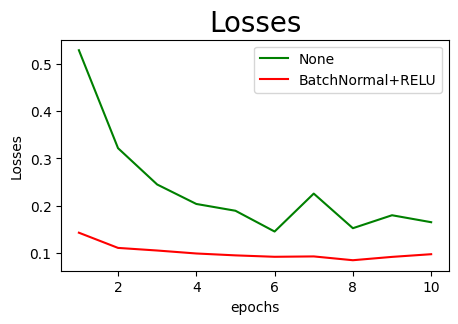

In [49]:
plt.figure(figsize = (5,3))
plt.plot(np.arange(1,11), history.history['val_loss'], color = 'green', label = 'None')
plt.plot(np.arange(1,11), batch_model.history['val_loss'], color = 'red', label = 'BatchNormal+RELU')
plt.title("Losses", fontsize = 20)
plt.xlabel('epochs')
plt.ylabel("Losses")
plt.legend()
plt.show

#4-5 활성화 함수
1. Relu
2. LeakyRelu

In [52]:
##Batch Normalization + ReakyReLU
Leaky_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                   tf.keras.layers.Dense(64),
                                   tf.keras.layers.BatchNormalization(),
                                   tf.keras.layers.LeakyReLU(alpha=0.2),
                                   tf.keras.layers.Dense(32),
                                   tf.keras.layers.BatchNormalization(),
                                   tf.keras.layers.LeakyReLU(alpha=0.2),
                                   tf.keras.layers.Dense(10,activation = 'softmax')
                                   ])

In [53]:
Leaky_model.compile(optimizer='adam',
                    loss = 'sparse_categorical_crossentropy',
                    metrics=['accuracy'])
Leaky_model = Leaky_model.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 13s 5ms/step - loss: 0.3223 - accuracy: 0.9118 - val_loss: 0.1438 - val_accuracy: 0.9589
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1578 - accuracy: 0.9527 - val_loss: 0.1140 - val_accuracy: 0.9648
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1233 - accuracy: 0.9618 - val_loss: 0.1044 - val_accuracy: 0.9679
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1065 - accuracy: 0.9661 - val_loss: 0.0909 - val_accuracy: 0.9727
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0941 - accuracy: 0.9704 - val_loss: 0.0923 - val_accuracy: 0.9721
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0868 - accuracy: 0.9725 - val_loss: 0.0934 - val_accuracy: 0.9725
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0766 - accuracy: 0.9757 - val_loss: 0.0896 - val_accurac

<function matplotlib.pyplot.show(close=None, block=None)>

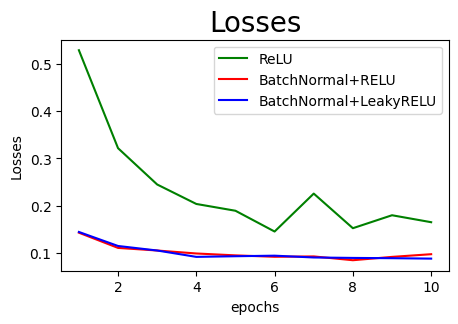

In [54]:
plt.figure(figsize = (5,3))
plt.plot(np.arange(1,11), history.history['val_loss'], color = 'green', label = 'ReLU')
plt.plot(np.arange(1,11), batch_model.history['val_loss'], color = 'red', label = 'BatchNormal+RELU')
plt.plot(np.arange(1,11), Leaky_model.history['val_loss'], color = 'blue', label = 'BatchNormal+LeakyRELU')
plt.title("Losses", fontsize = 20)
plt.xlabel('epochs')
plt.ylabel("Losses")
plt.legend()
plt.show

In [ ]:
##검증
model.evaluate(x_test,y_test)

In [ ]:
##검증결과 저장
test_loss, test_acc = model.evaluate(x_test, y_test)

print('검증셋 정확도: ', test_acc)

In [ ]:
predictions = model.predict(x_test)
predictions[0]

In [ ]:
predictions[0].max()

In [ ]:
np.argmax(predictions[0])

In [ ]:
def get_one_result(idx):
    img, y_true, y_pred, confidence = x_test[idx], y_test[idx],np.argmax(predictions[idx]), 100*np.max(predictions[idx])
    return img,y_true,y_pred,confidence

In [ ]:
fig,axes = plt.subplots(3,5)
fig.set_size_inches(12,10)

for i in range(15):
    ax = axes[i//5, i%5]
    img, y_true, y_pred, confidence = get_one_result(i)
    ax.imshow(x_train[i], cmap = 'gray')
    #x,y축 눈금
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'True : {y_true}', fontsize=12)
    ax.set_xlabel(f'Prediction : {y_pred}\nContidence :( {confidence:.2f}%)',fontsize = 10)
plt.tight_layout()
plt.show()